# P2: Investigando uma Base de Dados

## Dados Titanic

### Objetivo

O objetivo desse projeto é criar uma análise exploratória com a base de dados que contém uma amostra com informações dos sobrevivêntes do naufrágio do navio Titanic. Essa análise também tem por objetivo explorar aspectos básicos da linguagem python e seus principais pacotes para análise de dados.

### Breve história

> O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável". A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois. [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

A base contém dados demográficos e informações de 891 dos 2224 passageiros e tripulantes a bordo do Titanic. Você pode ver uma descrição deste conjunto de dados no [site do Kaggle] (https://www.kaggle.com/c/titanic/data), de onde os dados foram obtidos.

### Questionamentos

Considerando o contexto histórico e as informações contidas na base de dados disponível, podemos imaginar algumas perguntas interessantes sobre o que pode ter contribuído para que alguns passageiros sobrevivessem ou não

* 1 - Existe alguma aparente relação entre o número de sobreviventes e a idade do passageiro? 
* 2 - Existe alguma aparente relação entre o número de sobreviventes e o gênero do passageiro? 
* 3 - Será que passageiros acompanhados de seus familiares apresentam taxa de sobrevivência diferente dos passageiros sozinhos?
* 4 - A classe social do passageiro aparenta ter alguma influência na taxa de sobrevivência?

### Variáveis de interesse para responder as perguntas 

Dentre todas as variáveis, segue abaixo as variáveis que podem auxiliar a responder as perguntas propostas (explicação original do Kaggle):

- survival Survival (0 = No; 1 = Yes) 
- pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) 
- sex Sex 
- age Age 
- sibsp Number of Siblings/Spouses Aboard 
- parch Number of Parents/Children Aboard 

SPECIAL NOTES (explicação original do Kaggle): 

- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
    - Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored) Parent: Mother or Father of Passenger Aboard Titanic Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
    - Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.
    

### Análise exploratória

Primeiramente carregaremos os pacotes necessários e os dados.

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [353]:
titanic = pd.read_csv('titanic_data.csv') # leitura dos dados

Daremos uma boa olhada nos dados para começarmos a nos familiarizar com o conteúdo. Para tanto olharemos as 5 primeiras e as 5 últimas linhas

In [354]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [355]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Em seguida averiguar os tipos de dados e os totais de ocorrências

In [356]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Averiguar também alguns cálculos básicos sobre as variáveis numéricas

In [357]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observou-se que 177 passageiros aparentemente não possuem informações referentes à idade e 687 não possuem informações de Cabine. Idade é uma das variáveis de interesse que pode nos ajudar a responder as perguntas propostas, portanto, seria interessante tormamos alguma decisão quanto aos registros sem idade.

Verificaremos se há ocorrências duplicadas, partindo da premissa que PassengerId identifica unicamente cada passageiro.

In [358]:
len(list(titanic['PassengerId'].unique()))

891

Como observado, existem 891 passageiros diferentes nessa amostra, e temos 12 variáveis descritivas da amostra, sendo 5 delas categóricas. Dentre as variáveis categóricas, no escopo dessa análise faremos uso tão somente da variável referente ao gênero. As demais categóricas serão deliberadamente descartadas. Esse fato deve ser considerado como relevante na proposição das respostas.

In [359]:
# Conservando o dataframe original e criando um para sofrer as transformações
titanic_limpo = titanic
titanic_limpo.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1, inplace=True)
titanic_limpo.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Para lidar com a questão dos passageiros sem registro de idade, deliberadamente preencheremos os valores faltantes com a média das idades por sexo e classe. Talvez essa não seja a forma estatisticamente mais correta de inputar dados e lidar com valores faltantes, mas para não fugir muito do escopo do projeto nos limitaremos à essa deliberação. Essa deliberação para inputar valores faltantes deve ser considerada como fator relevante no momento de responder às perguntas propostas.

In [360]:
# Preenchendo valores faltantes com a média de idade por sexo e classe
titanic_limpo['Age'].fillna(titanic_limpo.groupby(['Sex', 'Pclass'])['Age'].transform('mean'), inplace=True)

Por fim, para finalizar uma primeira grande olhada nos dados, vale a pena considerar uma rápida análise visual do dataframe em busca de padrões iniciais que possam ajudar em algo. Uma boa forma de fazer essa rápida análise é usando a matriz de scatterplot, ou pairplot.

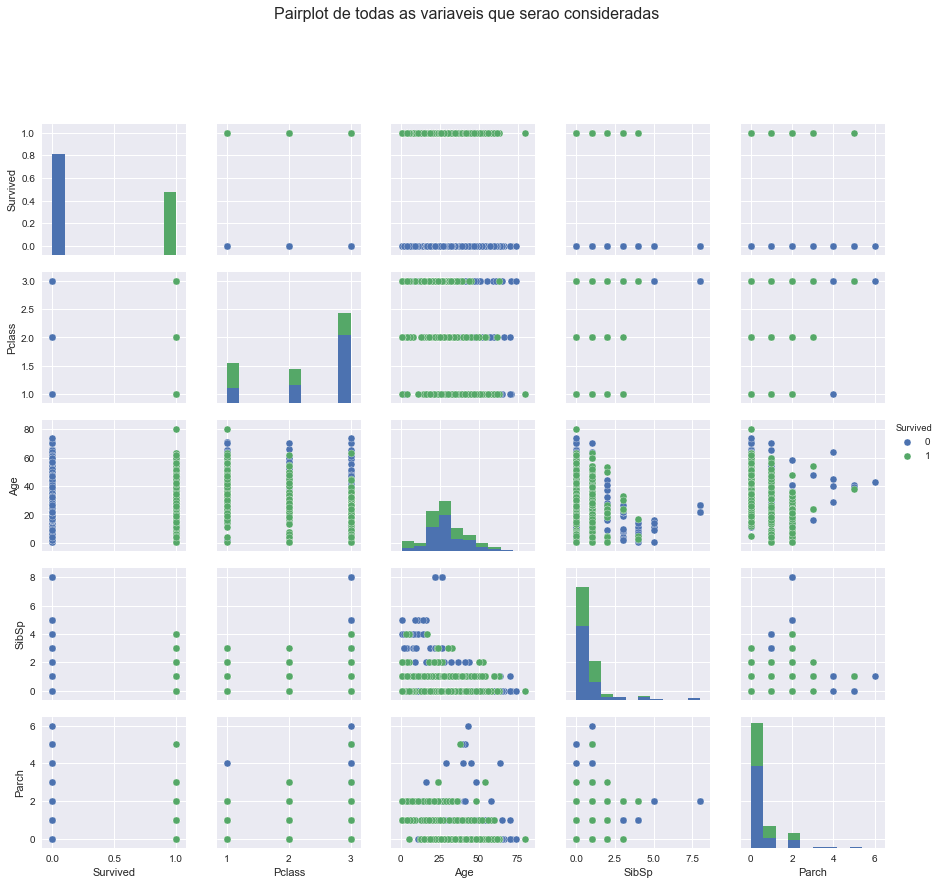

In [361]:
g = sns.pairplot(titanic_limpo, hue='Survived')
g.fig.suptitle("Pairplot de todas as variaveis que serao consideradas", size=16)
g.fig.subplots_adjust(top=.85)

Essa primeira visualização por si só não revelou padrões que saltem aos olhos. Espera-se que visualizações mais detalhadas consigam elucidar melhor os aspectos relevantes para que possamos responder as perguntas propostas.

Para deixar a leitura da análise um pouco mais fácil e elegante, converteremos o 0 e 1 da variável survived para Vivo ou Morto

In [362]:
# Criando label para indicar melhor se o passageiro está vivo ou morto
titanic_limpo['Survived_lbl'] = 0
titanic_limpo.loc[titanic_limpo.Survived == 1, ['Survived_lbl']] = 'Vivo'
titanic_limpo.loc[titanic_limpo.Survived == 0, ['Survived_lbl']] = 'Morto'
titanic_limpo.drop(['Survived'], axis=1, inplace=True)

titanic_limpo.head()

,Pclass,Sex,Age,SibSp,Parch,Survived_lbl
0,3,male,22.0,1,0,Morto
1,1,female,38.0,1,0,Vivo
2,3,female,26.0,0,0,Vivo
3,1,female,35.0,1,0,Vivo
4,3,male,35.0,0,0,Morto


Dadas as considerações acima, partiermos para tentar responder às perguntas.

### 1 - Existe alguma aparente relação entre o número de sobreviventes e a idade do passageiro? 

Primeiramenteo buscaremos entender como é a distribuição dos passageiros por idade.

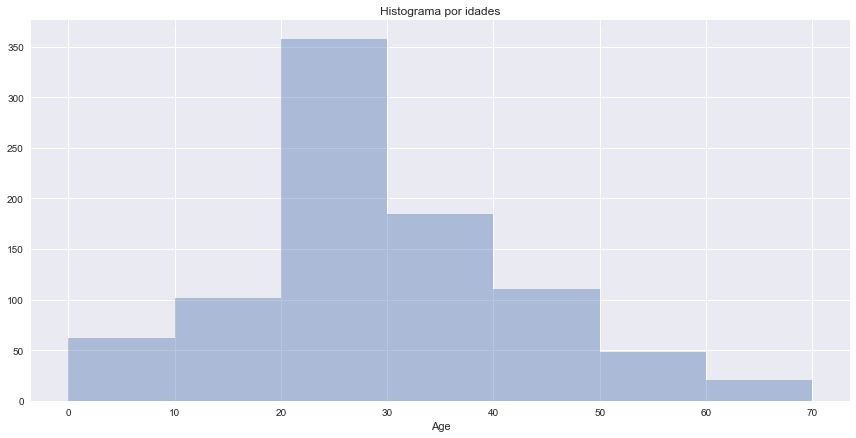

In [363]:
histogramas = sns.FacetGrid(titanic_limpo, size=6, aspect=2)
histogramas.map(sns.distplot,'Age', kde=False, bins=np.arange(0,80,10))

plt.title('Histograma por idades')

Percebe-se uma boa concentração de passageiros entre 20 e 40 anos.

Vamos averiguar a mesma distribuição se mantem entre os sobreviventes e mortos.

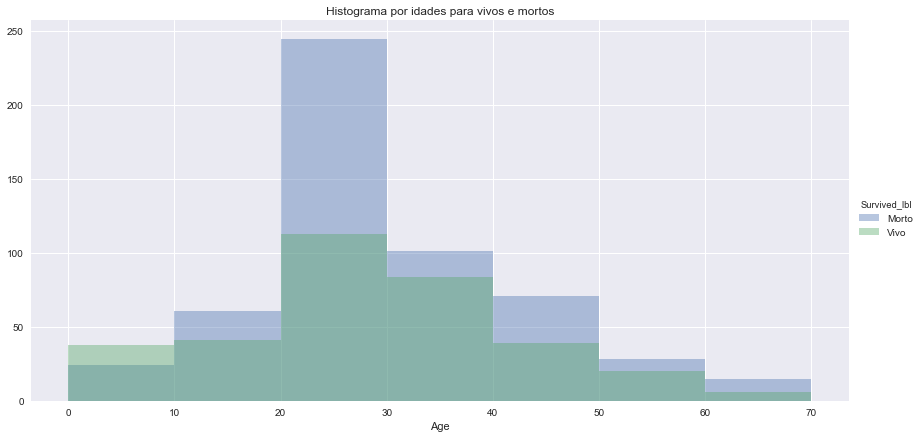

In [364]:
histogramas = sns.FacetGrid(titanic_limpo, hue="Survived_lbl", size=6, aspect=2)
histogramas.map(sns.distplot,'Age', kde=False, bins=np.arange(0,80,10))
histogramas.add_legend()

plt.title('Histograma por idades para vivos e mortos')

Parece haver uma concentração maior de mortos entre 20 e 30 anos.

Vamos olhar as quantidades e as médias das idades entre vivos e mortos.

In [365]:
titanic_limpo.groupby(['Survived_lbl'])['Age'].agg(['mean', 'count'])

,mean,count
Survived_lbl,,
Morto,30.025651,549
Vivo,28.183709,342


Para ilustrar, vamos usar o boxplot para visualizar melhor as diferenças

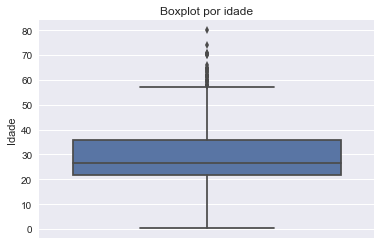

In [366]:
# Quanto à idade por si só 
sns.boxplot(y = "Age", data = titanic_limpo)

plt.ylabel('Idade')
plt.title('Boxplot por idade')

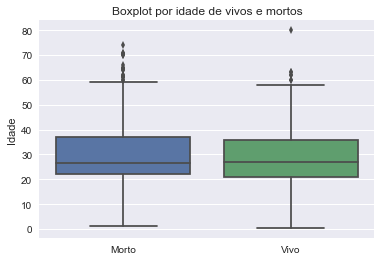

In [367]:
# Quanto à idade por sobrevivência
sns.boxplot(x = "Survived_lbl", y = "Age", data = titanic_limpo)

plt.xlabel('')
plt.ylabel('Idade')
plt.title('Boxplot por idade de vivos e mortos')

A média geral não parece ser muito diferente entre vivos e mortos, porém, dado que notamos uma concentração grande de mortos em uma faixa etária no histograma, talvez seja interessante separar os passageiros em grupos etários para vermos se há algum grupo que parece ter sobrevivido muito mais do que outro. A ideia de dividir em grupos nos ajudará a entender se houve algum tratamento diferente para crianças, adolescentes, jovens, adultos, ou idosos na hora de buscar botes ou locais seguros. 

Discricionariamente dividiremos as idades em grupos de 10.

In [368]:
# Levando em conta que as idades estão entre 0 e 80 anos, criaremos grupos que contemple esse espectro de idades.
idades = [0, 10, 20, 30, 40, 50, 60, 70, 80] 
titanic_limpo['Grupos_idade'] = pd.cut(titanic_limpo['Age'], idades)
titanic_limpo.drop(['Age'], axis=1, inplace=True)
titanic_limpo.head()

,Pclass,Sex,SibSp,Parch,Survived_lbl,Grupos_idade
0,3,male,1,0,Morto,"(20, 30]"
1,1,female,1,0,Vivo,"(30, 40]"
2,3,female,0,0,Vivo,"(20, 30]"
3,1,female,1,0,Vivo,"(30, 40]"
4,3,male,0,0,Morto,"(30, 40]"


In [369]:
# Contando o total de vivos e mortos por grupos de idade
sobreviventes_por_grupo_idade = (titanic_limpo.groupby(['Grupos_idade', 'Survived_lbl']).size()
                                 .rename('Total').reset_index())

sobreviventes_por_grupo_idade['%'] = (sobreviventes_por_grupo_idade
                                          .groupby(['Grupos_idade'])['Total']
                                          .transform('sum').rename('%').reset_index()['%'])

sobreviventes_por_grupo_idade['%'] = (sobreviventes_por_grupo_idade['Total']/
                                      sobreviventes_por_grupo_idade['%']*100).round(1)

sobreviventes_por_grupo_idade['% geral'] = len(titanic_limpo)

sobreviventes_por_grupo_idade['% geral'] = (sobreviventes_por_grupo_idade['Total']/
                                      sobreviventes_por_grupo_idade['% geral']*100).round(1)
sobreviventes_por_grupo_idade

,Grupos_idade,Survived_lbl,Total,%,% geral
0,"(0, 10]",Morto,26,40.6,2.9
1,"(0, 10]",Vivo,38,59.4,4.3
2,"(10, 20]",Morto,71,61.7,8.0
3,"(10, 20]",Vivo,44,38.3,4.9
4,"(20, 30]",Morto,248,67.4,27.8
5,"(20, 30]",Vivo,120,32.6,13.5
6,"(30, 40]",Morto,93,53.8,10.4
7,"(30, 40]",Vivo,80,46.2,9.0
8,"(40, 50]",Morto,69,64.5,7.7
9,"(40, 50]",Vivo,38,35.5,4.3


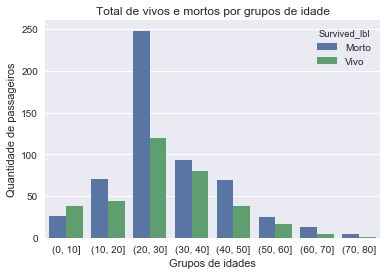

In [370]:
# Visualiando o resultado
sns.barplot(x="Grupos_idade", y="Total", hue="Survived_lbl",
              data=sobreviventes_por_grupo_idade)

plt.xlabel('Grupos de idades')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de vivos e mortos por grupos de idade')

Nesse ponto, apenas com elementos visuais e com a tabela de totais, podemos perceber que há uma grande diferença nos totais de vivos e mortos no grupo de idade entre 20 e 30 anos, com um total absoluto de 248 mortos **(27,8% do total geral de passageiros)** representando **67,4%** de mortos nesse grupo, e apenas **32,6%** de sobrevivente. Vale notar também que no grupo de idades entre 0 e 10 anos houve mais sobreviventes (59,4%) do que mortos (40,6%), fato que não ocorre nos demais grupos (sempre há mais mortos que sobreviventes).

Devemos lembrar que houve preenchimento dos dados de idade que faltavam e as demais variáveis foram ignoradas, ou seja, a idade está sendo analisada isoladamente. Vale lembrar também que, limitando o escopo da análise, não foi realizado nenhum teste estatístico de fato. Resultados mais profundos talves fossem observados se outras variáveis fossem analisadas conjuntamente com a idade.

#### **Respondendo a pergunta, parece haver algum fator que fez com que as pessoas entre 20 e 30 anos morressem muito mais do que sobrevivessem, bem como algum outro fator que tenha feito as crianças entre 0 e 10 anos sobrevivessem mais do que morressem.** 

Extrapolando os dados, pode ser que os adultos jovens (de 20 a 30 anos) tenham tentado ajudar crianças e idosos a se salvarem primeiro e dessa forma se expuseram a maiores riscos, aumentando sua chance de morrer.

### 2 - Existe alguma aparente relação entre o número de sobreviventes e o gênero do passageiro?

Vamos traduzir os valores para apresentar melhor os resultados

In [371]:
titanic_limpo.loc[titanic_limpo.Sex == 'male', ['Sex']] = 'Homem'
titanic_limpo.loc[titanic_limpo.Sex == 'female', ['Sex']] = 'Mulher'

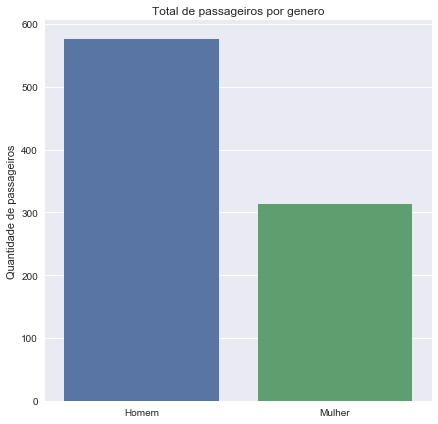

In [372]:
# Verificando as proporções entre homens e mulheres
sns.factorplot('Sex', data = titanic_limpo, kind = 'count', size=6)

plt.xlabel('')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de passageiros por genero')

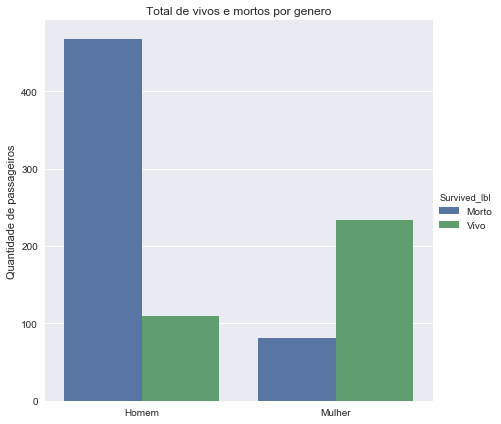

In [373]:
# Verificando as proporções de vivos e mortos entre homens e mulheres
sns.factorplot('Sex', hue = 'Survived_lbl', data = titanic_limpo, kind = 'count', size=6)

plt.xlabel('')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de vivos e mortos por genero')

In [374]:
# Contando o total de vivos e mortos por gênero
sobreviventes_por_genero = (titanic_limpo.groupby(['Sex', 'Survived_lbl']).size()
                                 .rename('Total').reset_index())
sobreviventes_por_genero['%'] = (sobreviventes_por_genero
                                          .groupby(['Sex'])['Total']
                                          .transform('sum').rename('%').reset_index()['%'])
sobreviventes_por_genero['%'] = (sobreviventes_por_genero['Total']/
                                      sobreviventes_por_genero['%']*100).round(1)

sobreviventes_por_genero['% geral'] = len(titanic_limpo)

sobreviventes_por_genero['% geral'] = (sobreviventes_por_genero['Total']/
                                      sobreviventes_por_genero['% geral']*100).round(1)
sobreviventes_por_genero

,Sex,Survived_lbl,Total,%,% geral
0,Homem,Morto,468,81.1,52.5
1,Homem,Vivo,109,18.9,12.2
2,Mulher,Morto,81,25.8,9.1
3,Mulher,Vivo,233,74.2,26.2


Parece que há uma diferença grande quanto a proporção de sobreviventes e mortos entre homens e mulheres. **52,5%** dos mortos foram homens, enquanto apenas **9,1%** foram mulheres. Entre os homens o número de mortos (468) foi mais do que o quádruplo do número de sobreviventes (109), ou seja, **81,1%** dos homens morreram, e entre as mulheres o número de sobreviventes (233) foi quase o triplo do número de mortos (81), tendo vivido **74,2%** das mulheres. A taxa de sobrevivência entre as mulheres **(74,2%)** foi muito maior do que entre os homens **(18,9%)**.

Porém, para enriquecer mais a análise quanto ao gênero e também complementar a pergunta anterior que investigava a idade, vamos visualizar quanto são os mortos e sobreviventes entre homens e mulheres dentro de cada grupo de idades usado anteriormente.

In [375]:
# Contando o total de vivos e mortos por grupos de idade e gênero
sobreviventes_por_genero_e_grupo_idade = (titanic_limpo.groupby(['Sex', 'Grupos_idade', 'Survived_lbl']).size()
                                 .rename('Total').reset_index())
sobreviventes_por_genero_e_grupo_idade['%'] = (sobreviventes_por_genero_e_grupo_idade
                                          .groupby(['Sex', 'Grupos_idade'])['Total']
                                          .transform('sum').rename('%').reset_index()['%'])
sobreviventes_por_genero_e_grupo_idade['%'] = (sobreviventes_por_genero_e_grupo_idade['Total']/
                                      sobreviventes_por_genero_e_grupo_idade['%']*100).round(1)

sobreviventes_por_genero_e_grupo_idade['% geral'] = len(titanic_limpo)

sobreviventes_por_genero_e_grupo_idade['% geral'] = (sobreviventes_por_genero_e_grupo_idade['Total']/
                                      sobreviventes_por_genero_e_grupo_idade['% geral']*100).round(1)
sobreviventes_por_genero_e_grupo_idade

,Sex,Grupos_idade,Survived_lbl,Total,%,% geral
0,Homem,"(0, 10]",Morto,14,42.4,1.6
1,Homem,"(0, 10]",Vivo,19,57.6,2.1
2,Homem,"(10, 20]",Morto,59,85.5,6.6
3,Homem,"(10, 20]",Vivo,10,14.5,1.1
4,Homem,"(20, 30]",Morto,211,86.8,23.7
5,Homem,"(20, 30]",Vivo,32,13.2,3.6
6,Homem,"(30, 40]",Morto,84,77.1,9.4
7,Homem,"(30, 40]",Vivo,25,22.9,2.8
8,Homem,"(40, 50]",Morto,59,77.6,6.6
9,Homem,"(40, 50]",Vivo,17,22.4,1.9


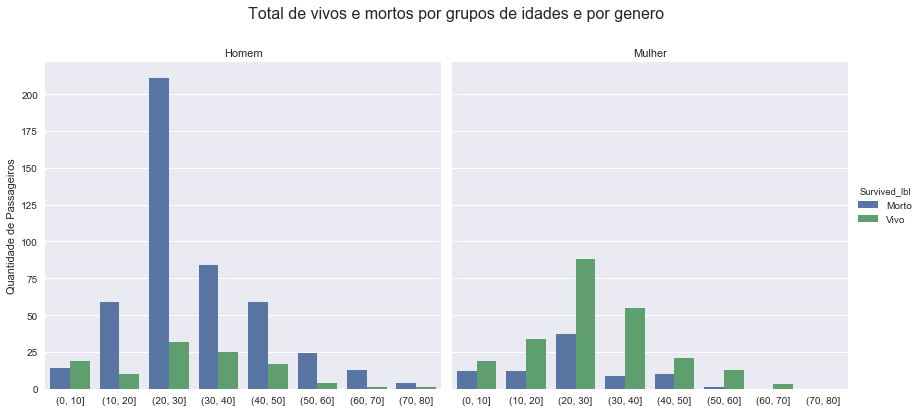

In [376]:
barras_idades_genero = sns.factorplot(x="Grupos_idade", y="Total", hue="Survived_lbl", col='Sex', kind='bar',
            data=sobreviventes_por_genero_e_grupo_idade, size=6)

g = barras_idades_genero.set_axis_labels("", "Quantidade de Passageiros").set_titles("{col_name}")


g.fig.suptitle("Total de vivos e mortos por grupos de idades e por genero", size=16)
g.fig.subplots_adjust(top=.85)

#### **Respondendo a pergunta, é bem evidente que o gênero tem alguma relação com a sobrevivência do passageiro, pois 74,2% das mulheres sobrevieram, enquanto apenas 18,9% dos homens sobreviveram. Com o exposto acima, percebe-se que homens morreram, proporcionalmente, muito mais do que as mulheres. Tal constatação se mantem a mesma entre todos os grupos de idades usados anteriormente. Mulheres, de todos os grupos de idade, sobreviveram mais do que morreram. Já os homens, morreram mais do que sobreviveram em todos os grupos de idades, exceto no grupo das crianças entre 0 e 10 anos, que sobreviveram mais do que morreram, com uma taxa de sobrevivência de 61,3% entre as crianças mulheres e 57,6% entre as crianças homens. Vale notar que a resposta da análise quanto a idade parece ficar mais evidente quando detalhada por gênero: homens entre 20 e 30 anos foram os que mais morreram, representando 23,7% do total de passageiros** 

Extrapolando os dados, pode ser que os homens, principalmente entre 20 e 30 anos, tenham se exposto mais a riscos para salvar as mulheres, aumentando a chance de morte durante a tragédia.

### 3 - Será que passageiros acompanhados de seus familiares apresentam taxa de sobrevivência diferente dos passageiros sozinhos?

Para simplificar um pouco a análise necessária para responder essa pergunta, iremos considerar as quantidades referentes a família como um todo, ou seja, consideraremos conjuntamente as duas variáveis apresentadas na amostra. Portanto, criaremos uma nova variável para o total de familiares: SibSp + Parch.

In [377]:
titanic_limpo['Familia'] = titanic_limpo['SibSp'] + titanic_limpo['Parch'] 
titanic_limpo.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic_limpo.head()

,Pclass,Sex,Survived_lbl,Grupos_idade,Familia
0,3,Homem,Morto,"(20, 30]",1
1,1,Mulher,Vivo,"(30, 40]",1
2,3,Mulher,Vivo,"(20, 30]",0
3,1,Mulher,Vivo,"(30, 40]",1
4,3,Homem,Morto,"(30, 40]",0


In [378]:
titanic_limpo.tail()

,Pclass,Sex,Survived_lbl,Grupos_idade,Familia
886,2,Homem,Morto,"(20, 30]",0
887,1,Mulher,Vivo,"(10, 20]",0
888,3,Mulher,Morto,"(20, 30]",3
889,1,Homem,Vivo,"(20, 30]",0
890,3,Homem,Morto,"(30, 40]",0


In [379]:
titanic_limpo['Familia'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Familia, dtype: float64

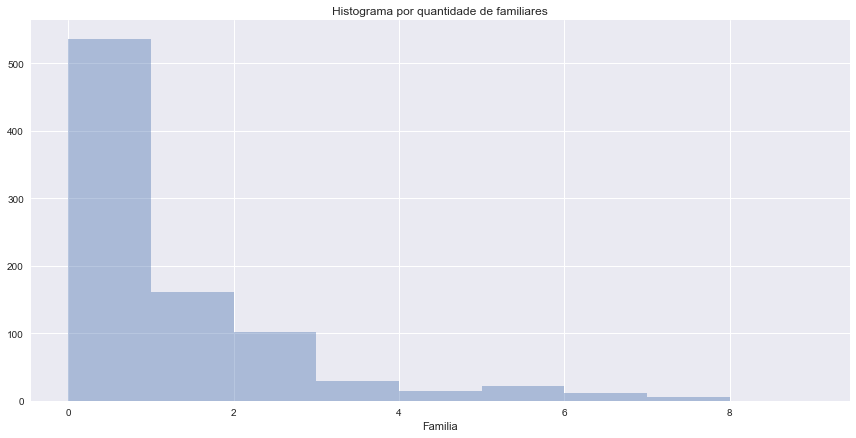

In [380]:
histogramas = sns.FacetGrid(titanic_limpo, size=6, aspect=2)
histogramas.map(sns.distplot,'Familia', kde=False, bins=np.arange(0,10,1))

plt.title('Histograma por quantidade de familiares')

Percebe-se claramente uma grande concentração de passageiros entre nenhum e dois membros da família

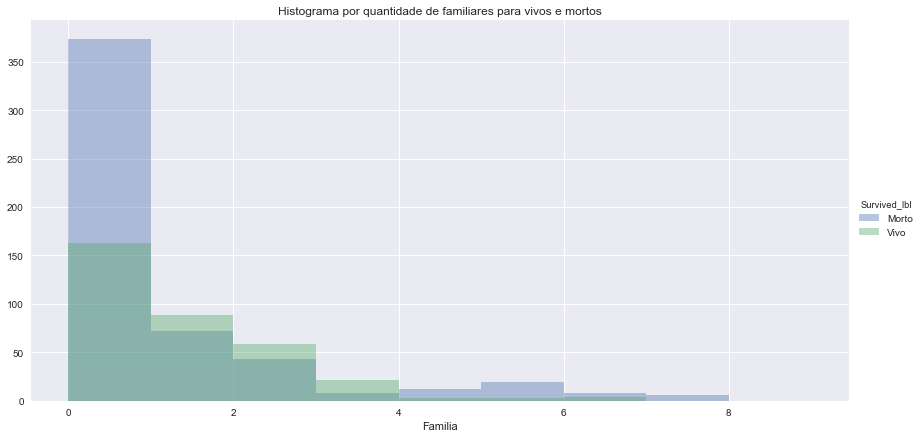

In [381]:
histogramas = sns.FacetGrid(titanic_limpo, hue='Survived_lbl', size=6, aspect=2)
histogramas.map(sns.distplot, 'Familia', kde=False, bins=np.arange(0,10,1))
histogramas.add_legend()

plt.title('Histograma por quantidade de familiares para vivos e mortos')

A distribuição dos passageiros por membros de família aparentemente não muda muito entre vivos e mortos.

In [382]:
titanic_limpo.groupby(['Survived_lbl'])['Familia'].agg(['mean', 'count'])

,mean,count
Survived_lbl,,
Morto,0.883424,549
Vivo,0.938596,342


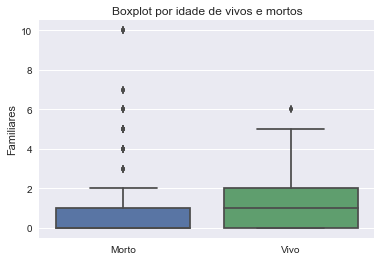

In [383]:
# Quanto à idade por sobrevivência
sns.boxplot(x = "Survived_lbl", y = "Familia", data = titanic_limpo)

plt.xlabel('')
plt.ylabel('Familiares')
plt.title('Boxplot por idade de vivos e mortos')

As médias de familiares entre vivos e mortos são muito parecidas e muito próximas de zero, sendo difícil perceber qualquer relação entre entre o número de familiares e a sobrevivência como um todos, porém, vale notar que existem muitos passageiros sem nenhum tipo de familiares a bordo (zero). Para tentar tirar proveito dessa informação, vamos trabalhar com uma variável binária: tem familiar abordo e não tem familiar a bordo.

In [384]:
# Criando label para indicar se o passageiro tem familiares ou se está sozinho
titanic_limpo['Familia_lbl'] = 0
titanic_limpo.loc[titanic_limpo.Familia > 0, ['Familia_lbl']] = 'Com familiares'
titanic_limpo.loc[titanic_limpo.Familia == 0, ['Familia_lbl']] = 'Sozinho'
titanic_limpo.drop(['Familia'], axis=1, inplace=True)

titanic_limpo.head()

,Pclass,Sex,Survived_lbl,Grupos_idade,Familia_lbl
0,3,Homem,Morto,"(20, 30]",Com familiares
1,1,Mulher,Vivo,"(30, 40]",Com familiares
2,3,Mulher,Vivo,"(20, 30]",Sozinho
3,1,Mulher,Vivo,"(30, 40]",Com familiares
4,3,Homem,Morto,"(30, 40]",Sozinho


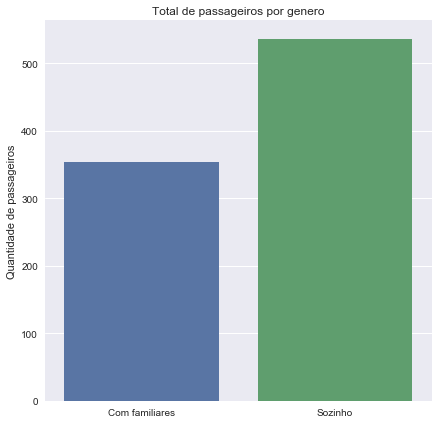

In [385]:
# Verificando as proporções entre passageiros com familiares e sozinhos
sns.factorplot('Familia_lbl', data = titanic_limpo, kind = 'count', size=6)

plt.xlabel('')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de passageiros por genero')

Existem mais passageiros sozinhos. Veremos se a proporção parece a mesma quando separamos por vivos e mortos.

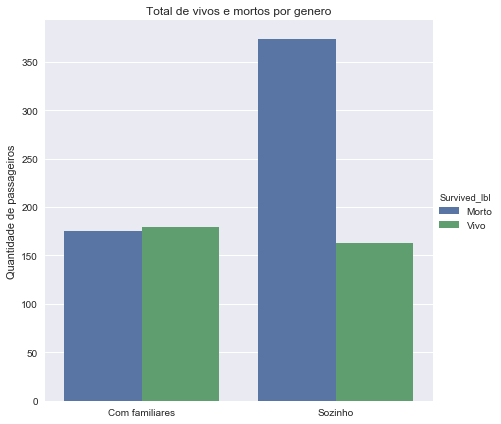

In [386]:
sns.factorplot('Familia_lbl', hue = 'Survived_lbl', data = titanic_limpo, kind = 'count', size=6)

plt.xlabel('')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de vivos e mortos por genero')

In [387]:
# Contando o total de vivos e mortos sozinhos e com familiares
sobreviventes_por_familiares = (titanic_limpo.groupby(['Familia_lbl', 'Survived_lbl']).size()
                                 .rename('Total').reset_index())
sobreviventes_por_familiares['%'] = (sobreviventes_por_familiares
                                          .groupby(['Familia_lbl'])['Total']
                                          .transform('sum').rename('%').reset_index()['%'])
sobreviventes_por_familiares['%'] = (sobreviventes_por_familiares['Total']/
                                      sobreviventes_por_familiares['%']*100).round(1)

sobreviventes_por_familiares['% geral'] = len(titanic_limpo)

sobreviventes_por_familiares['% geral'] = (sobreviventes_por_familiares['Total']/
                                      sobreviventes_por_familiares['% geral']*100).round(1)
sobreviventes_por_familiares

,Familia_lbl,Survived_lbl,Total,%,% geral
0,Com familiares,Morto,175,49.4,19.6
1,Com familiares,Vivo,179,50.6,20.1
2,Sozinho,Morto,374,69.6,42.0
3,Sozinho,Vivo,163,30.4,18.3


Interessante notar que a quantidade de mortos e sobreviventes com familiares é muito próxima, com uma diferença de menos que 1 ponto percentual (0,8), e a quantidade de mortos sozinhos (374) é praticamente o dobro da quantidade de sobreviventes sozinhos (163), ou seja, os mortos sem família representam **69,6%** dentre os passageiros sem família e representam **42%** do total de passageiros.

Para enriquecer a análise, vamos averiguar a quantidade de vivos e mortos, por familiares e outras variáveis.

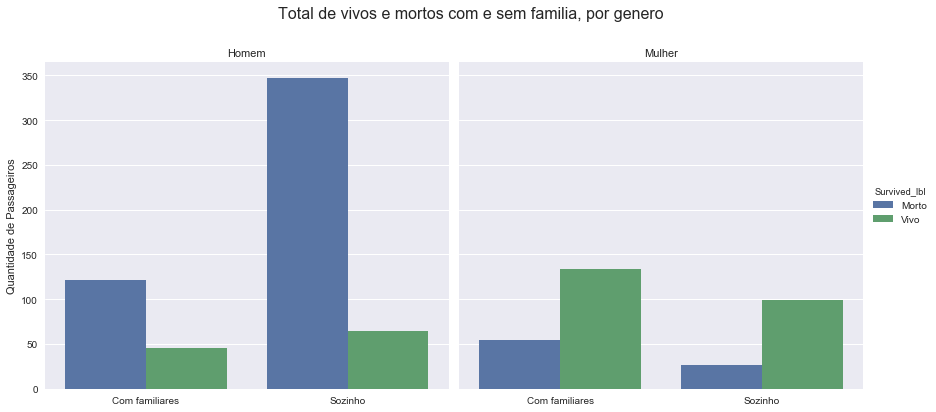

In [388]:
barras_familia_genero = sns.factorplot('Familia_lbl', hue = 'Survived_lbl', col='Sex', data = titanic_limpo, kind = 'count', size=6)


g = barras_familia_genero.set_axis_labels("", "Quantidade de Passageiros").set_titles("{col_name}")
g.fig.suptitle("Total de vivos e mortos com e sem familia, por genero", size=16)
g.fig.subplots_adjust(top=.85)

In [389]:
# Contando o total de vivos e mortos sozinhos e com familiares, por gênero
sobreviventes_por_familiares_genero = (titanic_limpo.groupby(['Familia_lbl', 'Sex', 'Survived_lbl']).size()
                                 .rename('Total').reset_index())
sobreviventes_por_familiares_genero['%'] = (sobreviventes_por_familiares_genero
                                          .groupby(['Familia_lbl', 'Sex'])['Total']
                                          .transform('sum').rename('%').reset_index()['%'])
sobreviventes_por_familiares_genero['%'] = (sobreviventes_por_familiares_genero['Total']/
                                      sobreviventes_por_familiares_genero['%']*100).round(1)

sobreviventes_por_familiares_genero['% geral'] = len(titanic_limpo)

sobreviventes_por_familiares_genero['% geral'] = (sobreviventes_por_familiares_genero['Total']/
                                      sobreviventes_por_familiares_genero['% geral']*100).round(1)
sobreviventes_por_familiares_genero

,Familia_lbl,Sex,Survived_lbl,Total,%,% geral
0,Com familiares,Homem,Morto,121,72.9,13.6
1,Com familiares,Homem,Vivo,45,27.1,5.1
2,Com familiares,Mulher,Morto,54,28.7,6.1
3,Com familiares,Mulher,Vivo,134,71.3,15.0
4,Sozinho,Homem,Morto,347,84.4,38.9
5,Sozinho,Homem,Vivo,64,15.6,7.2
6,Sozinho,Mulher,Morto,27,21.4,3.0
7,Sozinho,Mulher,Vivo,99,78.6,11.1


Em relação ao gênero, aparentemente homens sozinhos morreram mais, proporcionalmente falando, em relação aos demais casos, representando **38,9%** do total dos passageiros e **84.4%** dos passageiros homens sem família.

Avaliaremos agora em relação ao grupo de idades.

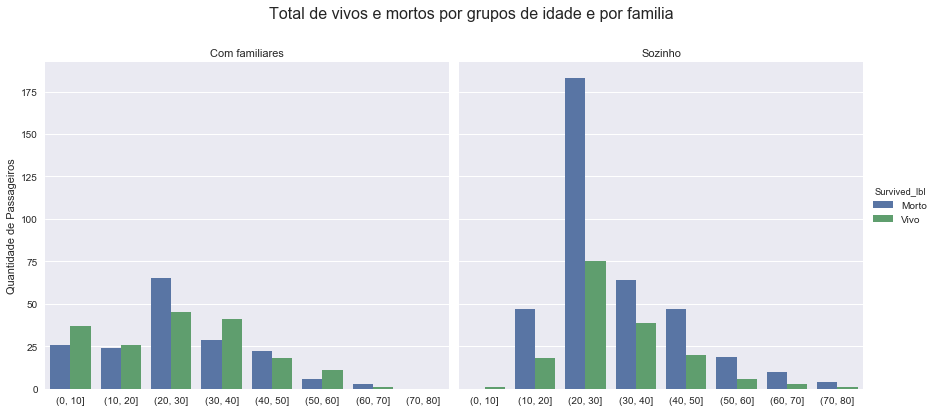

In [390]:
barras_idades_genero_familia = sns.factorplot(x='Grupos_idade', hue = 'Survived_lbl', col='Familia_lbl',
               data = titanic_limpo, kind = 'count', size=6)

g = barras_idades_genero_familia.set_axis_labels("", "Quantidade de Passageiros").set_titles("{col_name}")
g.fig.suptitle("Total de vivos e mortos por grupos de idade e por familia", size=16)
g.fig.subplots_adjust(top=.85)

Parece haver uma sutil melhora na relação de sobreviventes em todos os grupos de idade dentre os passageiros com familiares, há grupos inclusive com mais sobreviventes do que mortos.

#### **Respondendo a pergunta, apenas com análises superficiais não foi possível observar relações claras entre o número de familiares e o fato de sobreviver ou não. Porém, ao simplificarmos a questão para tratar passageiros com algum familiar e passageiros sozinhos (sem nenhum familiar), foi possível perceber que a quantidade de mortos e sobreviventes entre passageiros com familiares foi praticamente a mesma (menos de 1% de diferença), já passageiros sozinhos parecem ter uma taxa de mortailidade maior, representando 42% do total de passageiros. Ao detalhar os passageiros com familiares e sozinhos por gênero, foi possível notar que homens sozinhos morreram mais, representando 38,9% do total de passageiros. Ao detalhar passageiros com familiares e sozinhos por grupos de idades, foi possível notar os que possuiam familiares e eram crianças de 0 a 10, jovens de 10 a 20 e adultos de 30 a 40 e senhores(as) de 50 a 60 anos apresentaram taxa de sobrevivência positiva e melhor do que quem estava sozinho e pertencia aos mesmos grupos de idade.**

### 4 - A classe social do passageiro aparenta ter alguma influência na taxa de sobrevivência?

Conforme descrito nas informações dos dados originais, a variável Pclass é uma proxy para a situação socio econômica do passageiro. Sendo assim, vamos renomear os valores de forma mais apropriada.

In [391]:
# Criando label para informar melhor a classe como classe social do passageiro
titanic_limpo['Classe_lbl'] = 0
titanic_limpo.loc[titanic_limpo.Pclass == 1, ['Classe_lbl']] = 'Alta'
titanic_limpo.loc[titanic_limpo.Pclass == 2, ['Classe_lbl']] = 'Media'
titanic_limpo.loc[titanic_limpo.Pclass == 3, ['Classe_lbl']] = 'Baixa'
titanic_limpo.drop(['Pclass'], axis=1, inplace=True)

titanic_limpo.head()

,Sex,Survived_lbl,Grupos_idade,Familia_lbl,Classe_lbl
0,Homem,Morto,"(20, 30]",Com familiares,Baixa
1,Mulher,Vivo,"(30, 40]",Com familiares,Alta
2,Mulher,Vivo,"(20, 30]",Sozinho,Baixa
3,Mulher,Vivo,"(30, 40]",Com familiares,Alta
4,Homem,Morto,"(30, 40]",Sozinho,Baixa


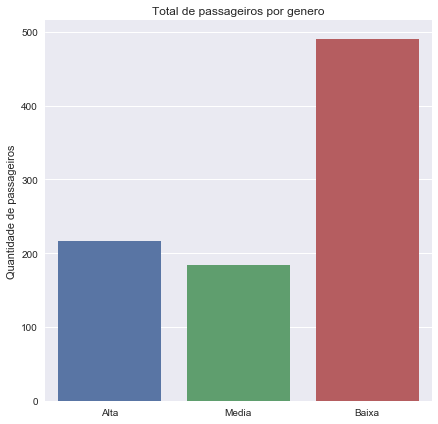

In [392]:
# Verificando as proporções entre quantidades passageiros nas diferentes classes
sns.factorplot('Classe_lbl', data = titanic_limpo, kind = 'count', size=6,
              order=['Alta', 'Media', 'Baixa'])

plt.xlabel('')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de passageiros por genero')

Nitidamente existem muito mais passageiros de classe baixa.

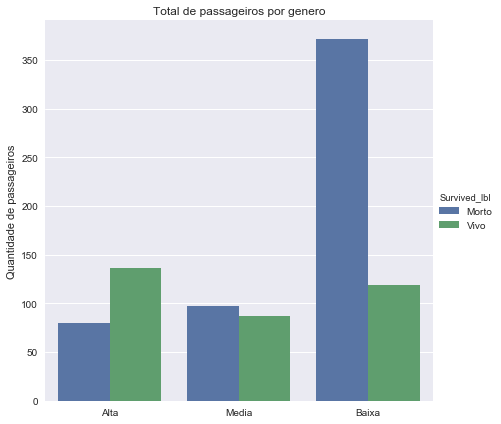

In [393]:
# Verificando as proporções entre homens e mulheres
sns.factorplot('Classe_lbl', hue='Survived_lbl', data = titanic_limpo, kind = 'count', size=6,
              order=['Alta', 'Media', 'Baixa'])

plt.xlabel('')
plt.ylabel('Quantidade de passageiros')
plt.title('Total de passageiros por genero')

Fica claro que, proporcionalmente, morreram muito mais passageiros da classe baixa. Nota-se também que, na classe alta, mais passageiros sobreviveram. Já na classe média, a relação de vivos e mortos parece equilibrada.

In [394]:
# Contando o total de vivos e mortos por classe
sobreviventes_por_classe = (titanic_limpo.groupby(['Classe_lbl', 'Survived_lbl']).size()
                                 .rename('Total').reset_index())
sobreviventes_por_classe['%'] = (sobreviventes_por_classe
                                          .groupby(['Classe_lbl'])['Total']
                                          .transform('sum').rename('%').reset_index()['%'])
sobreviventes_por_classe['%'] = (sobreviventes_por_classe['Total']/
                                      sobreviventes_por_classe['%']*100).round(1)
sobreviventes_por_classe['% geral'] = len(titanic_limpo)

sobreviventes_por_classe['% geral'] = (sobreviventes_por_classe['Total']/
                                      sobreviventes_por_classe['% geral']*100).round(1)
sobreviventes_por_classe

,Classe_lbl,Survived_lbl,Total,%,% geral
0,Alta,Morto,80,37.0,9.0
1,Alta,Vivo,136,63.0,15.3
2,Baixa,Morto,372,75.8,41.8
3,Baixa,Vivo,119,24.2,13.4
4,Media,Morto,97,52.7,10.9
5,Media,Vivo,87,47.3,9.8


Percebe-se que a taxa de mortailidade dentre os passageiros de classe baixa foi muito alta **(75,8%)**, cerca de **41,8%** do total de passageiros. Por outro lado, a taxa de sobrevivência dentre passageiros de classe alta foi de **63%**, chegando a **15,3%** do total de passageiros.

Vamos enriquecer a análise de sobrevivente classes sociais adicionando outras variáveis. Começaremos pelos grupos de idades.

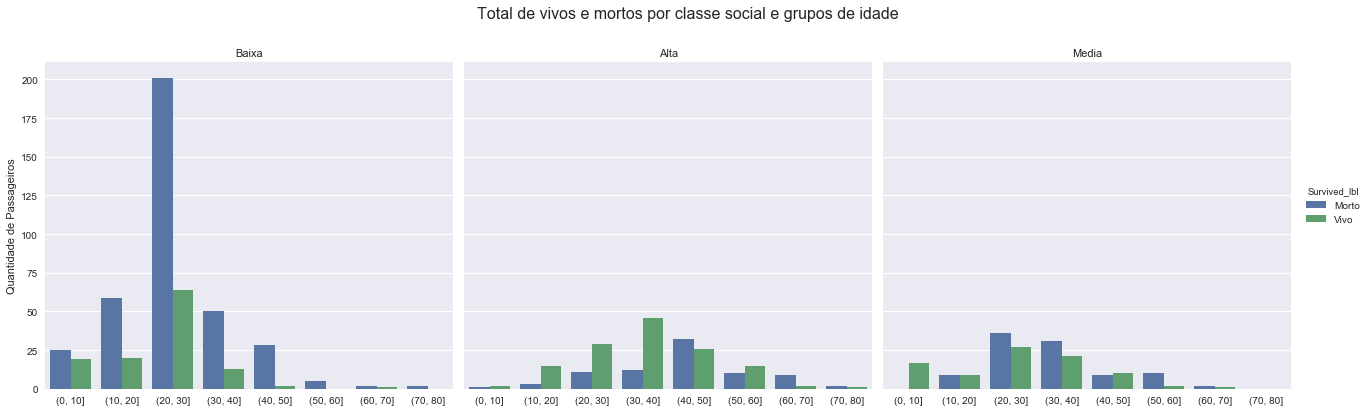

In [395]:
barras_idades_classe = sns.factorplot(x='Grupos_idade', hue = 'Survived_lbl', col='Classe_lbl',
               data = titanic_limpo, kind = 'count', size=6)

g = barras_idades_classe.set_axis_labels("", "Quantidade de Passageiros").set_titles("{col_name}")
g.fig.suptitle("Total de vivos e mortos por classe social e grupos de idade", size=16)
g.fig.subplots_adjust(top=.85)

Curiosamente a classe baixa foi a única que apresentou uma relação negativa de sobreviventes no grupo das crianças (0 a 10 anos), bem como proporção de mortos muito maior em todos os grupos de idade. Já a classe alta parece ter tido muito mais sucesso em sobreviver, exceto no grupo dos 40 a 50 anos e 60 a 70 anos, que apresentou mais mortos do que vivos.

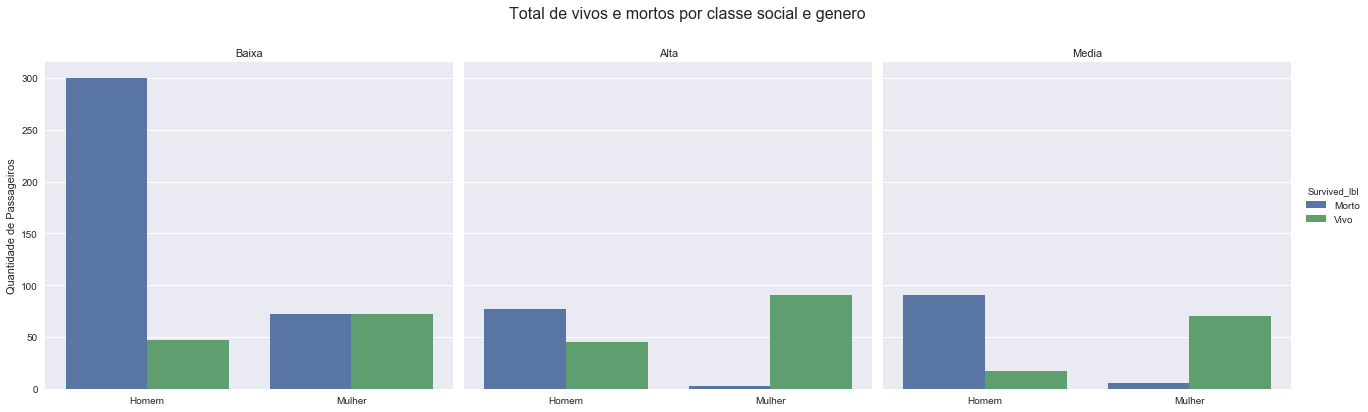

In [396]:
barras_genero_classe = sns.factorplot(x='Sex', hue = 'Survived_lbl', col='Classe_lbl',
               data = titanic_limpo, kind = 'count', size=6)

g = barras_genero_classe.set_axis_labels("", "Quantidade de Passageiros").set_titles("{col_name}")
g.fig.suptitle("Total de vivos e mortos por classe social e genero", size=16)
g.fig.subplots_adjust(top=.85)

Analisando a classe social por gênero, percebe-se que, a maioria das mulheres de classe alta e classe média sobreviveram, sendo que as mulheres de classe baixa não tiveram tanta sorte. Já os homens de classe baixa morreram proporcionalmente mais do que os homens das demais classes.

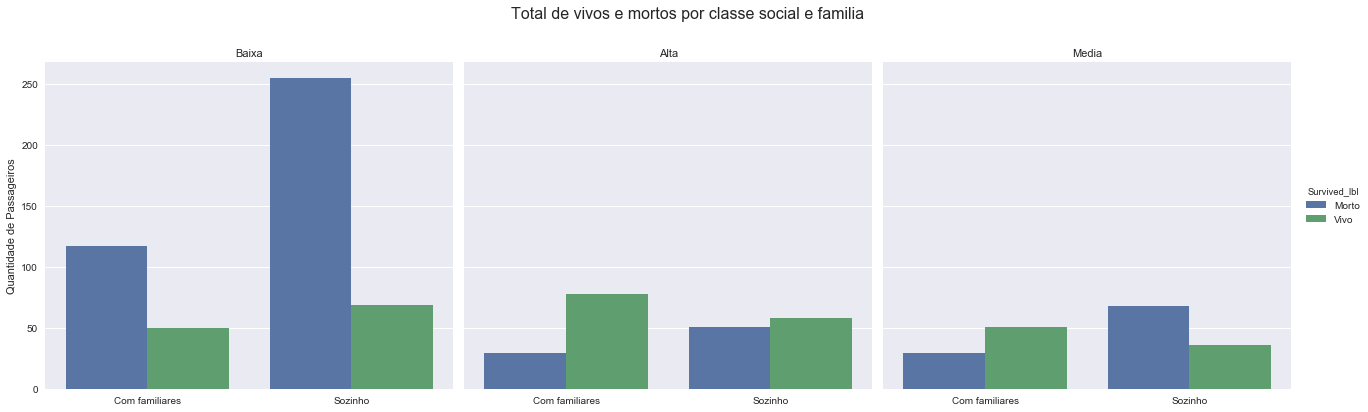

In [397]:
barras_genero_classe = sns.factorplot(x='Familia_lbl', hue = 'Survived_lbl', col='Classe_lbl',
               data = titanic_limpo, kind = 'count', size=6)

g = barras_genero_classe.set_axis_labels("", "Quantidade de Passageiros").set_titles("{col_name}")
g.fig.suptitle("Total de vivos e mortos por classe social e familia", size=16)
g.fig.subplots_adjust(top=.85)

Analisando as classes sociais em relação ao passgeiro estar acompanhado ou não, percebe-se que, apenas na classe baixa a mortalidade dentre os passageiros com familiares foi maior, nas demais classes sobreviveram mais passageiros com familiares. Nota-se também que, apenas na classe alta houve mais sobreviventes sozinhos do que nas outras classes, que tiveram mais mortos do que sobreviventes sozinhos.

#### Respondendo a pergunta, parece que a classe social tem influência na taxa sobrevivência (63% para classe Alta, 47,3% para classe Média e 24,2% para a classe Baixa). Percebe-se que passageiros de classe Alta tiveram mais sucesso em sobreviver do que passageiros da classe baixa e média. Já passageiros de classe baixa não tiveram tanto sucesso, onde os mortos chegaram a 41,8% do total de passageiros. Tal padrão se mantém mesmo detalhando com outras variáveis. Obviamente testes estatísticos seriam necessários para quantificar a influência e isolar os demais fatores. 

Estrapolando os dados, pode ser que quanto maior for a calsse do passageiros, ele tenham mais condição de pagar por lugares melhores, mais perto dos pontos de fuga e botes salva-vidas. A lógica inversa serve para os passageiros de classe baixa: quanto menor a classe, talvez o passageiro só tenha condição de pagar por lugares com pouco acesso a lugares mais seguros.

### Conclusão e Projeto futuro

O presente trabalho precisa ser complementado com análises e cálculos estatísticos para confirmação e maior aprofundamento das respostas aos questionamentos. No entanto, o objetivo do trabalho não era exaurir todas as avaliações em sua máxima profundidade, e sim proporcional ao autor um contato maior com análise exploratória utilzando a linguagem python bem como seus principais pacotes para análise de dados.

Cabe ressaltar que as variáveis ignoradas no escopo desse trabalho são de suma importância para uma análise mais completa e devem ser consideradas para análises de previsão ou inferências estatísticas mais robustas. Variaveis textuais, como Nome por exemplo, podem ter uma relevância muito grande quando bem tratadas. Percebe-se que na variável nome existe também um pronome de tratamento, que pode ser um bom indicativo complementar de classe social. Outra análise possível da variável nome seria mapear nomes de pessoas notadamente conhecidas e populares à epoca que podem ter tido tratamento especial no momento da tragédia.

### Referências

https://pt.wikipedia.org/wiki/RMS_Titanic
https://www.kaggle.com/c/titanic/data
http://seaborn.pydata.org/api.html
http://pandas.pydata.org/pandas-docs/stable/
https://jupyter.readthedocs.io/en/latest/index.html